In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('flood-draft_final.pdf')
df = pd.read_csv('FloodRisk.csv')
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 20.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
sort = df.sort_values(by=['Lon', 'Lat'])
h = .0002 
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
n_neighbors = 38

In [6]:
for i in range(10):
    start = i*5000;
    end = (i+1)*5000;
    print(start)
    print(end)
    X=sort.iloc[start:end,0:2].values
    y=sort.iloc[start:end,7].values
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,edgecolor='k',s=20)
    j = i+1
    plt.title("Plot no %i"% (j))
    #plt.show()
    pp.savefig()
    plt.clf()
    for weights in ['uniform', 'distance']:
        # we create an instance of Neighbours Classifier and fit the data.
        cla = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
        cla.fit(X, y)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        x_min, x_max = X[:, 0].min() - 0.001, X[:, 0].max() + 0.001
        y_min, y_max = X[:, 1].min() - 0.001, X[:, 1].max() + 0.001
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
        mesh = np.c_[xx.ravel(), yy.ravel()]
        Z = cla.predict(np.c_[xx.ravel(), yy.ravel()])
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.figure()
        k = plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,edgecolor='k', s=20)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.legend(loc=2)
        plt.title("3-Class classification (k = %i, weights = '%s')"% (n_neighbors, weights))
        pp.savefig()
        plt.clf()
    #plt.show()
pp.close()    

0
5000
5000
10000
10000
15000
15000
20000
20000
25000
25000
30000
30000
35000
35000
40000
40000
45000
45000
50000


/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [79]:
for i in range(10):
    start = i*5000;
    end = (i+1)*5000;
    print(start)
    print(end)
    X=sort.iloc[start:end,0:2].values
    y=sort.iloc[start:end,7].values
    print("Batch %i"%(i))
    #RISK LEVEL 1
    R1 =  []
    for i in range(y.shape[0]):
        if(y[i] == 1):
            R1.append(X[i])
    r1 = np.asarray(R1)

    #RISK LEVEL 2
    R2 =  []
    for i in range(y.shape[0]):
        if(y[i] == 2):
            R2.append(X[i])
    r2 = np.asarray(R2)

    #RISK LEVEL 3
    R3 =  []
    for i in range(y.shape[0]):
        if(y[i] == 3):
            R3.append(X[i])
    r3 = np.asarray(R3)
    print(r1.shape)
    print(r2.shape)
    print(r3.shape)

0
5000
Batch 0
(3832, 2)
(1168, 2)
(0,)
5000
10000
Batch 1
(1294, 2)
(3706, 2)
(0,)
10000
15000
Batch 2
(1211, 2)
(3789, 2)
(0,)
15000
20000
Batch 3
(1912, 2)
(1057, 2)
(2031, 2)
20000
25000
Batch 4
(962, 2)
(1268, 2)
(2770, 2)
25000
30000
Batch 5
(1693, 2)
(2262, 2)
(1045, 2)
30000
35000
Batch 6
(1615, 2)
(2407, 2)
(978, 2)
35000
40000
Batch 7
(604, 2)
(2946, 2)
(1450, 2)
40000
45000
Batch 8
(39, 2)
(1858, 2)
(3103, 2)
45000
50000
Batch 9
(1649, 2)
(538, 2)
(2813, 2)


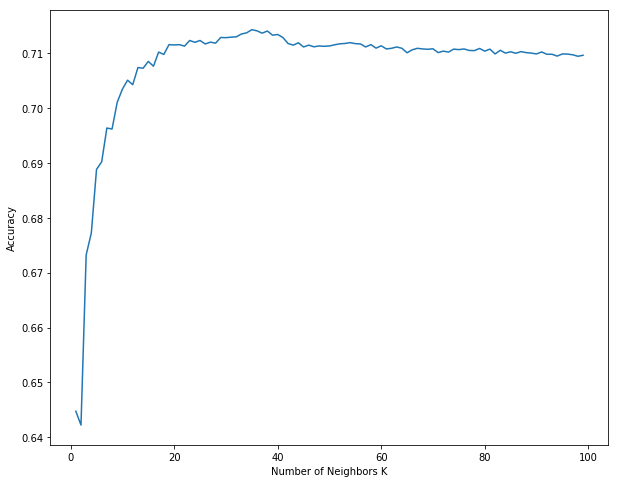

In [101]:
plt.rcParams['figure.figsize'] = (10, 8.0) # set default size of plots
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
#n_neighbors = 30
n = list(range(1,100))
acc_S = []
for n_neighbours in range(1,100):
    S = 0
    #print(n_neighbours)
    for i in range(10):
        start = i*5000;
        end = (i+1)*5000;
        #print(start)
        #print(end)
        X=sort.iloc[start:end,0:2].values
        y=sort.iloc[start:end,7].values
        for weights in ['uniform', 'distance']:
            # we create an instance of Neighbours Classifier and fit the data.
            cla = neighbors.KNeighborsClassifier(n_neighbours, weights=weights)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
            cla.fit(X_train, y_train)
            pred = cla.predict(X_test)
            acc = accuracy_score(y_test, pred)
            S = S + acc;
            #print(acc)
    #print("FINAL ACCURACY")
    #print((S/20))
    acc_S.append((S/20))

plt.plot(n,acc_S)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.show()    

#for 2-CLASS RED->RISK_LEVEL1 BLUE->RISK_LEVEL2
#for 3-CLASS RED->RISK_LEVEL1 GREEN->RISK_LEVEL2 BLUE->RISK_LEVEL3